In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df=lambda x:pd.DataFrame(x)

In [2]:
#键值对式序列化库
PICKLE_PATH='../softfits.pick'
import shelve
def set_pickle(k='temp',v=''):
    with shelve.open(PICKLE_PATH) as file:
        file[k]=v

def get_pickle(k):
    if k is None:
        return False
    with shelve.open(PICKLE_PATH) as file:
        try:
            v=file[k]
        except KeyError:
            return None
        else:
            return v

# 需要
1. 地球坐标，半径
2. 原图及亮度
3. 过滤噪声后，等离子层的边缘
# 方案step
1. 以地球坐标为中心建立极坐标系(没有，则用图片中心代替，半径则假设55)
2. 以等离子层为外径，地球为内径(没有，则用假设内径55，和外径55x4),截取一个圆环
3. 对圆环寻找一个划分线，使得左右的亮度差最大
4. 画出太阳方向，即与划分线垂直，指向亮度高的方向。

In [31]:
地球=[307, 287,  51]#圆心，半径

In [ ]:
#1[309, 319,  59]
#2[307, 287,  51]
#3[323, 297,  70]
#4[277, 291,  70]
#5[313, 323,  63]

In [32]:
img1=get_pickle('img2')

In [33]:
img1.max(),img1.min(),img1.mean()

(814.7796, 0.0, 21.51524)

In [34]:
#此处假定img为600x600x1的浮点式亮度图。
def 求极坐标(img,地球=[300,300,55]):
    center=(地球[0],地球[1])
    def cart2pol(x, y):
        rho = np.sqrt((x-center[0])**2 + (y-center[1])**2)
        phi = np.arctan2((y-center[1]), (x-center[0]))
        return(rho, phi)

    def pol2cart(rho, phi):
        x = rho * np.cos(phi)
        y = rho * np.sin(phi)
        return(x+center[0], y+center[1])
    # 将图片转换为(坐标，亮度),返回生成器
    toPair=lambda img:(((x,y),img[x,y]) for x,y in zip(*np.where(img)))
    # 转换成极坐标形式
    PolPair=[(cart2pol(*pos),va) for pos,va in toPair(img)]
    return PolPair

In [35]:
PolPair=求极坐标(img1,地球)

In [36]:
划分角度=-91#确保在（-180，180）内
def 扇区判断(arc):#划分角度的逆时针扇区
    s=arc
    if 划分角度>0:
        L,H=math.radians(划分角度),math.radians(划分角度-180)
    else:
        L,H=math.radians(划分角度),math.radians(划分角度+180)
    if H>L:
        if s>L and s<=H :
            return True
    else:
        if s>L or s<=H :
            return True

In [ ]:
res={}
for i in range(-180,180):
  划分角度=i
  cc=filter(lambda x:x[0][0]>(地球[2]-5),PolPair)
  cc=filter(lambda x:x[0][0]<100,cc)
  cc=filter(lambda x:扇区判断(x[0][1]),cc)
  cc=[x[1] for x in cc]
  res[i]=sum(cc)

In [ ]:
#表示划分线的两角度方向
L=min(res.items(), key=lambda x: x[1])[0]
R=max(res.items(), key=lambda x: x[1])[0]

In [ ]:
太阳方向=L-90
#太阳方向=R+90#检验用
太阳方向

以下存在角度方向坐标转换问题，可能求出的坐标，y值需要翻转

In [ ]:
#绘制
from matplotlib.lines import Line2D
def 绘制太阳方向(img,地球,f):
    center=(地球[0],地球[1])
    太阳方向=math.radians(f)
    def pol2cart(rho, phi):
        x = rho * np.cos(phi)
        y = rho * np.sin(phi)
        return(x, y)
    
    fig, ax = plt.subplots()
    ax.imshow(img)
    #line1 = [pol2cart(100,math.radians(-15)),pol2cart(100,math.radians(165))]
    #(line1_xs, line1_ys) = zip(*line1)
    #ax.add_line(Line2D(line1_xs, line1_ys, linewidth=1, color='red'))
    #ax.add_line(Line2D([0,309], [600,319], linewidth=1, color='red'))
    #ax.annotate('Sun', xy = pol2cart(300,太阳方向), xytext = pol2cart(200,太阳方向), 
    #            arrowprops = dict(facecolor = 'red', shrink = 0.1))
    (a,b)=pol2cart(150,太阳方向)
    ax.arrow(地球[0],地球[1],a,b, width=5,head_width=15, head_length=20,fc='red', ec='red')
    plt.plot()
    plt.show()  
    #plt.imshow('solor.png',img)
绘制太阳方向(img1,地球,太阳方向)

---------------------------------------
以下为草稿

In [157]:
center=(309,319)
def cart2pol(x, y):
    rho = np.sqrt((x-center[0])**2 + (y-center[1])**2)
    phi = np.arctan2((y-center[1]), (x-center[0]))
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x+center[0], y+center[1])

In [163]:
pol2cart(10,math.radians(-15)),pol2cart(10,math.radians(156))

((318.65925826289066, 316.41180954897482),
 (299.86454542357399, 323.067366430758))

In [9]:
# 将图片转换为(坐标，亮度),返回生成器
toPair=lambda img:(((x,y),img[x,y]) for x,y in zip(*np.where(img)))

In [14]:
len(vv)

240069

In [13]:
vv=tuple(toPair(img1))

In [18]:
# 转换成极坐标形式
PolPair=[(cart2pol(*pos),va) for pos,va in toPair(img1)]

In [34]:
sss=list(ss)
ppp=list(pp)

In [37]:
max(pp),min(pp)

(368.40331160292249, 0.0)

In [36]:
max(ss),min(ss)

(3.1415926535897931, -3.1370264752793111)

In [33]:
#统计角度值
ss=set()
for pos,i in PolPair:
    ss.add(pos[1])

In [32]:
#统计p值
pp=set()
for pos,i in PolPair:
    pp.add(pos[0])

In [ ]:
#局域统计(指定p区间内)，寻找最优角度，从而二分图形实现最大差值，或最小值


In [48]:
len(ss)

146152

In [41]:
cc=filter(lambda x:x[0][0]>50,PolPair)

In [43]:
cc=list(cc)
cc

[((348.51829220286271, -2.4435479970831988), 7.5906),
 ((347.87641483722348, -2.4457502188429121), 7.5906),
 ((347.75278575447817, -2.4416997838705496), 7.5906),
 ((347.10949281170633, -2.4439034453463719), 7.5906),
 ((346.46789173024388, -2.4461152792275977), 7.5906),
 ((345.82799192662242, -2.4483353092982316), 5.0604),
 ((345.18980286213554, -2.4505635591957082), 5.0604),
 ((347.63486591537389, -2.4376465344982159), 7.5906),
 ((346.98847243100164, -2.439843422155628), 7.5906),
 ((346.34375986871771, -2.4420484994207525), 7.5906),
 ((345.70073763299956, -2.4442617906092092), 7.5906),
 ((345.059415173677, -2.4464833198962048), 5.0604),
 ((344.41980198589044, -2.4487131113119918), 5.0604),
 ((343.78190761004282, -2.4509511887372613), 5.0604),
 ((343.14574163174456, -2.4531975758984781), 5.0604),
 ((342.51131368175271, -2.4554522963631555), 2.5302),
 ((346.87317567087831, -2.4357806329442848), 7.5906),
 ((346.22536013411843, -2.4379788708103409), 7.5906),
 ((345.57922391254948, -2.44018

In [45]:
len(cc),len(PolPair)

(232224, 240069)

In [111]:
PolPair

[((348.51829220286271, -2.4435479970831988), 7.5906),
 ((347.87641483722348, -2.4457502188429121), 7.5906),
 ((347.75278575447817, -2.4416997838705496), 7.5906),
 ((347.10949281170633, -2.4439034453463719), 7.5906),
 ((346.46789173024388, -2.4461152792275977), 7.5906),
 ((345.82799192662242, -2.4483353092982316), 5.0604),
 ((345.18980286213554, -2.4505635591957082), 5.0604),
 ((347.63486591537389, -2.4376465344982159), 7.5906),
 ((346.98847243100164, -2.439843422155628), 7.5906),
 ((346.34375986871771, -2.4420484994207525), 7.5906),
 ((345.70073763299956, -2.4442617906092092), 7.5906),
 ((345.059415173677, -2.4464833198962048), 5.0604),
 ((344.41980198589044, -2.4487131113119918), 5.0604),
 ((343.78190761004282, -2.4509511887372613), 5.0604),
 ((343.14574163174456, -2.4531975758984781), 5.0604),
 ((342.51131368175271, -2.4554522963631555), 2.5302),
 ((346.87317567087831, -2.4357806329442848), 7.5906),
 ((346.22536013411843, -2.4379788708103409), 7.5906),
 ((345.57922391254948, -2.44018

In [ ]:
#max 版本，即只保留该方向最大值
res={}
for i in range(-180,180):
  划分角度=i
  cc=filter(lambda x:x[0][0]>55,PolPair)
  cc=filter(lambda x:x[0][0]>100,cc)
  cc=filter(lambda x:扇区判断(x[0][1]),cc)
  cc=[x[1] for x in cc]
  res[i]=sum(cc)

In [117]:
sorted(res.items(),key=lambda x:x[1])

[(-15, 1260093.9766427875),
 (-16, 1260716.7585107684),
 (-14, 1260803.9377861023),
 (-13, 1261830.9688619971),
 (-17, 1262363.0069242716),
 (-18, 1262820.9265506268),
 (-12, 1263638.0031183362),
 (-19, 1264181.4469136),
 (-11, 1266161.6064831614),
 (-20, 1266539.8764584064),
 (-21, 1269030.2371795177),
 (-10, 1269492.7626821399),
 (-22, 1272049.7457875013),
 (-9, 1273012.0744830966),
 (-23, 1275359.6540690064),
 (-8, 1277721.40165025),
 (-24, 1279463.6122745275),
 (-7, 1283479.1853604913),
 (-25, 1284128.7283873558),
 (-6, 1289516.6918129921),
 (-26, 1289540.9828677177),
 (-27, 1294489.1964468956),
 (-5, 1296289.4223752618),
 (-28, 1300292.4374134541),
 (-4, 1303096.1455730796),
 (-29, 1306819.7382650375),
 (-3, 1309645.2391040921),
 (-30, 1313642.5088250637),
 (-2, 1316380.5856623054),
 (-31, 1320429.152058363),
 (-1, 1323627.3636367917),
 (-32, 1327651.6804070473),
 (0, 1334909.1004558206),
 (-33, 1335548.6499971747),
 (1, 1339548.3647469878),
 (-34, 1343383.5600801706),
 (2, 134858

In [116]:
res

defaultdict(int,
            {-180: 3951333.8584550619,
             -179: 3946694.5941638947,
             -178: 3937653.1266028881,
             -177: 3927478.5765599012,
             -176: 3916733.1900029182,
             -175: 3906770.806633234,
             -174: 3896432.2575771809,
             -173: 3885538.7884491682,
             -172: 3873845.7408665419,
             -171: 3861953.6429520845,
             -170: 3850287.3147130013,
             -169: 3838005.5055956841,
             -168: 3825430.4208627939,
             -167: 3812358.5343977213,
             -166: 3800109.4059877396,
             -165: 3785176.801612258,
             -164: 3770878.6123615503,
             -163: 3757697.2569602728,
             -162: 3742667.953622818,
             -161: 3727238.956944108,
             -160: 3711957.7289915085,
             -159: 3696229.898593545,
             -158: 3680314.4197640419,
             -157: 3664552.8670758605,
             -156: 3647985.4363974929,
             

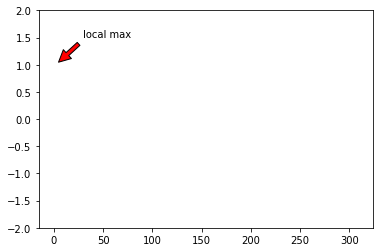

In [199]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots()
ax.add_line(Line2D([0,309], [600,319], linewidth=1, color='red'))

plt.plot()
plt.annotate('Sun', xy = (2, 1), xytext = (30, 1.5), 
             arrowprops = dict(facecolor = 'red', shrink = 0.1))
plt.ylim(-2, 2)
plt.show()